# Programming Task: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

## Your task

This notebook provides a code skeleton for performing linear regression. 
Your task is to complete the functions where required. 
You are only allowed to use built-in Python functions, as well as any `numpy` functions. No other libraries / imports are allowed. 

In the beginning of every function there is docstring which specifies the input and and expected output.
Write your code in a way that adheres to it.
You may only use plain python and anything that we imported for you above such as numpy functions (i.e. no other scikit-learn classifiers).

## Exporting the results to PDF
Once you complete the assignments, export the entire notebook as PDF and attach it to your homework solutions. 
The best way of doing that is
1. Run all the cells of the notebook (`Kernel -> Restart & Run All`)
2. Export/download the notebook as PDF (`File -> Download as -> PDF via LaTeX (.pdf)`)
3. Concatenate your solutions for other tasks with the output of Step 2. On Linux you can simply use `pdfunite`, there are similar tools for other platforms too. You can only upload a single PDF file to Moodle.

**Make sure** you are using `nbconvert` **Version 5.5 or later** by running `jupyter nbconvert --version`. Older versions clip lines that exceed page width, which makes your code harder to grade.

## Load and preprocess the data

In this assignment we will work with the Boston Housing Dataset.
The data consists of 506 samples. Each sample represents a district in the city of Boston and has 13 features, such as crime rate or taxation level. The regression target is the median house price in the given district (in $1000's).

More details can be found here: http://lib.stat.cmu.edu/datasets/boston

In [2]:
X , y = load_boston(return_X_y=True)

# Add a vector of ones to the data matrix to absorb the bias term
# (Recall slide #7 from the lecture)
X = np.hstack([np.ones([X.shape[0], 1]), X])
# From now on, D refers to the number of features in the AUGMENTED dataset (i.e. including the dummy '1' feature for the absorbed bias term)

# Split into train and test
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

## Task 1: Fit standard linear regression

In [3]:
def fit_least_squares(X, y):
    """Fit ordinary least squares model to the data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    y : array, shape [N]
        Regression targets.
        
    Returns
    -------
    w : array, shape [D]
        Optimal regression coefficients (w[0] is the bias term).
        
    """
    ### BEGIN SOLUTION ###
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w
    ### END SOLUTION ###

## Task 2: Fit ridge regression

In [4]:
def fit_ridge(X, y, reg_strength):
    """Fit ridge regression model to the data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    y : array, shape [N]
        Regression targets.
    reg_strength : float
        L2 regularization strength (denoted by lambda in the lecture)
        
    Returns
    -------
    w : array, shape [D]
        Optimal regression coefficients (w[0] is the bias term).
    
    """
    ### BEGIN SOLUTION ###
    D = X.shape[1]  # Number of features
    identity = np.identity(D)
    w = np.linalg.inv(X.T @ X + reg_strength * identity) @ X.T @ y
    
    return w
    ### END SOLUTION ###

## Task 3: Generate predictions for new data

In [6]:
def predict_linear_model(X, w):
    """Generate predictions for the given samples.
    
    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    w : array, shape [D]
        Regression coefficients.
        
    Returns
    -------
    y_pred : array, shape [N]
        Predicted regression targets for the input data.
        
    """
    ### BEGIN SOLUTION ###
    y_pred = X @ w

    return y_pred
    ### END SOLUTION ###

## Task 4: Mean squared error

In [7]:
def mean_squared_error(y_true, y_pred):
    """Compute mean squared error between true and predicted regression targets.
    
    Reference: `https://en.wikipedia.org/wiki/Mean_squared_error`
    
    Parameters
    ----------
    y_true : array
        True regression targets.
    y_pred : array
        Predicted regression targets.
        
    Returns
    -------
    mse : float
        Mean squared error.
        
    """
    ### BEGIN SOLUTION ###
     # Calculate mean squared error
    mse = np.mean((y_true - y_pred) ** 2)

    return mse
    ### END SOLUTION ###

## Compare the two models

The reference implementation produces for test size 0.2
* MSE for Least squares $\approx$ **23.96**
* MSE for Ridge regression $\approx$ **21.03**

You results might be slightly (i.e. $\pm 1\%$) different from the reference solution due to numerical reasons. There are no tasks.

In [8]:
# Load the data
np.random.seed(1234)
test_size=0.2
X , y = load_boston(return_X_y=True)
X = np.hstack([np.ones([X.shape[0], 1]), X])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

# Ordinary least squares regression
w_ls = fit_least_squares(X_train, y_train)
y_pred_ls = predict_linear_model(X_test, w_ls)
mse_ls = mean_squared_error(y_test, y_pred_ls)
print('MSE for Least squares = {0}'.format(mse_ls))

# Ridge regression
reg_strength = 1
w_ridge = fit_ridge(X_train, y_train, reg_strength)
y_pred_ridge = predict_linear_model(X_test, w_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('MSE for Ridge regression = {0}'.format(mse_ridge))

MSE for Least squares = 23.96457138495312
MSE for Ridge regression = 21.03493121591825


## Task 5: Compare sklearn and numpy Kfold 

The below sklearn K-fold Cross validation reference implementation is for you to read. For k=10 it produces
* MSE for Least squares $\approx$ **25.19**
* MSE for Ridge regression $\approx$ **26.70**

You results might be slightly (i.e. $\pm 0.1\%$) different from the reference solution due to numerical reasons.

In [9]:
def kfold_compare(n_folds):
    np.random.seed(1234)
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=1234)

    mse_ls_sum = 0
    mse_ridge_sum = 0
    X , y = load_boston(return_X_y=True)
    X = np.hstack([np.ones([X.shape[0], 1]), X])
    test_size = 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Ordinary least squares regression
        w_ls = fit_least_squares(X_train_fold, y_train_fold)
        y_pred_ls = predict_linear_model(X_val_fold, w_ls)
        mse_ls_fold = mean_squared_error(y_val_fold, y_pred_ls)
        mse_ls_sum += mse_ls_fold

        # Ridge regression
        reg_strength = 1
        w_ridge = fit_ridge(X_train_fold, y_train_fold, reg_strength)
        y_pred_ridge = predict_linear_model(X_val_fold, w_ridge)
        mse_ridge_fold = mean_squared_error(y_val_fold, y_pred_ridge)
        mse_ridge_sum += mse_ridge_fold

    # Calculate the average MSE over all folds
    avg_mse_ls = mse_ls_sum / n_folds
    avg_mse_ridge = mse_ridge_sum / n_folds

    #print('Average MSE for Least squares = {0}'.format(avg_mse_ls))
    #print('Average MSE for Ridge regression = {0}'.format(avg_mse_ridge))
    return avg_mse_ls, avg_mse_ridge

kfold_compare(n_folds=10)

(25.19511274208955, 26.702583876930895)

The correct custom numpy implementation produces for 10-fold cross validation
* MSE for Least squares $\approx$ **24.91**
* MSE for Ridge regression $\approx$ **26.66**

You results might be slightly (i.e. $\pm 0.1\%$) different from the reference solution due to numerical reasons. 

**Your task is to fill in the code to compute indices of subsets for validation fold and training fold, i.e. val_indices, train_indices**

In [10]:
def custom_kfold_compare(n_folds):
    np.random.seed(1234)

    mse_ls_sum = 0
    mse_ridge_sum = 0
    
    X , y = load_boston(return_X_y=True)
    X = np.hstack([np.ones([X.shape[0], 1]), X])
    test_size = 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    n_samples = X_train.shape[0]
    fold_size = n_samples // n_folds

    for i in range(n_folds):
        val_indices, train_indices = [], []
        ### BEGIN SOLUTION ####

        start_val = i * fold_size
        end_val = (i + 1) * fold_size
        
        val_indices = list(range(start_val, end_val))
        train_indices = [idx for idx in range(n_samples) if idx not in val_indices]

        ### END SOLUTION ####

        X_train_fold = X_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_train_fold = y_train[train_indices]
        y_val_fold = y_train[val_indices]

        # Ordinary least squares regression
        w_ls = fit_least_squares(X_train_fold, y_train_fold)
        y_pred_ls = predict_linear_model(X_val_fold, w_ls)
        mse_ls_fold = mean_squared_error(y_val_fold, y_pred_ls)
        mse_ls_sum += mse_ls_fold

        # Ridge regression
        reg_strength = 1
        w_ridge = fit_ridge(X_train_fold, y_train_fold, reg_strength)
        y_pred_ridge = predict_linear_model(X_val_fold, w_ridge)
        mse_ridge_fold = mean_squared_error(y_val_fold, y_pred_ridge)
        mse_ridge_sum += mse_ridge_fold

    # Calculate the average MSE over all folds
    avg_mse_ls = mse_ls_sum / n_folds
    avg_mse_ridge = mse_ridge_sum / n_folds

    return avg_mse_ls, avg_mse_ridge

# Call the function with n_folds=10 and print the results
custom_kfold_compare(n_folds=10)

(24.913053350782526, 26.666643064734238)

## Task 6: Compare different k fold cross validation
Plot K-fold Cross Validation MSE for Least Squares Vs Rigde Regression for k in {2,3,4,..,10} using custom numpy implementation

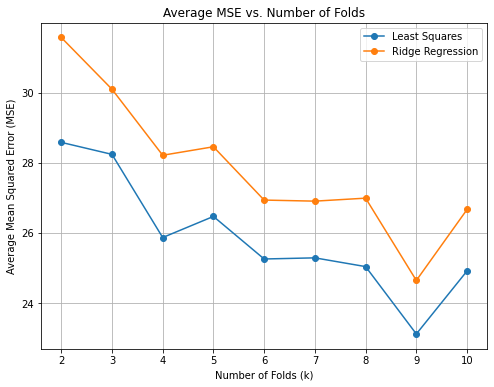

In [11]:
def plot_comparison(n_folds_values, results_ls,results_ridge):
    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(n_folds_values, results_ls, label='Least Squares', marker='o')
    plt.plot(n_folds_values, results_ridge, label='Ridge Regression', marker='o')
    plt.xlabel('Number of Folds (k)')
    plt.ylabel('Average Mean Squared Error (MSE)')
    plt.title('Average MSE vs. Number of Folds')
    plt.legend()
    plt.grid(True)
    plt.show()
    return 

n_folds_values = range(2,11,1)

### BEGIN SOLUTION ###
results_ls = []
results_ridge = []

for n_folds in n_folds_values:
    avg_mse_ls, avg_mse_ridge = custom_kfold_compare(n_folds)
    results_ls.append(avg_mse_ls)
    results_ridge.append(avg_mse_ridge)

### END SOLUTION ###

plot_comparison(n_folds_values, results_ls, results_ridge)

## Task 7: Leave One Out Cross Validation
The below sklearn reference implementation for leave one out cross validation is for you to read. It produces
* MSE for Least squares $\approx$ **23.72**
* MSE for Ridge regression $\approx$ **24.48**

You results might be slightly (i.e. $\pm 0.1\%$) different from the reference solution due to numerical reasons.  

In [12]:
X , y = load_boston(return_X_y=True)
X = np.hstack([np.ones([X.shape[0], 1]), X])

# Initialize lists to store MSE values
mse_ls_values = []
mse_ridge_values = []

# Create LOOCV iterator
loo = LeaveOneOut()

# Iterate through LOOCV splits
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Ordinary least squares regression
    w_ls = fit_least_squares(X_train, y_train)
    y_pred_ls = predict_linear_model(X_test, w_ls)
    mse_ls = mean_squared_error(y_test, y_pred_ls)
    mse_ls_values.append(mse_ls)

    # Ridge regression
    reg_strength = 1
    w_ridge = fit_ridge(X_train, y_train, reg_strength)
    y_pred_ridge = predict_linear_model(X_test, w_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_ridge_values.append(mse_ridge)

# Calculate the average MSE over all LOOCV iterations
avg_mse_ls_sk = np.mean(mse_ls_values)
avg_mse_ridge_sk = np.mean(mse_ridge_values)

print('Average MSE for Least squares (LOOCV) = {0}'.format(avg_mse_ls_sk))
print('Average MSE for Ridge regression (LOOCV) = {0}'.format(avg_mse_ridge_sk))

Average MSE for Least squares (LOOCV) = 23.7257455194757
Average MSE for Ridge regression (LOOCV) = 24.488356327312317


The correct custom numpy implementation produces for leave one out cross validation produces
* MSE for Least squares $\approx$ **23.72**
* MSE for Ridge regression $\approx$ **24.48**

You results might be slightly (i.e. $\pm 0.1\%$) different from the reference solution due to numerical reasons. 

**Your task is to fill in the code to compute subsets for validation fold and training fold, i.e. (X_train,y_train) and (X_val,y_val)**

In [13]:
# Initialize lists to store MSE values
mse_ls_values = []
mse_ridge_values = []

# Leave-One-Out Cross-Validation (LOOCV)
n = X.shape[0]

for i in range(n):
    ### BEGIN SOLUTION ###
    X_val = X[i:i+1]
    y_val = y[i:i+1]
    
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i)
    ### END SOLUTION ###
    
    # Ordinary least squares regression
    w_ls = fit_least_squares(X_train, y_train)
    y_pred_ls = predict_linear_model(X_val, w_ls)
    mse_ls = mean_squared_error(y_val, y_pred_ls)
    mse_ls_values.append(mse_ls)

    # Ridge regression
    reg_strength = 1
    w_ridge = fit_ridge(X_train, y_train, reg_strength)
    y_pred_ridge = predict_linear_model(X_val, w_ridge)
    mse_ridge = mean_squared_error(y_val, y_pred_ridge)
    mse_ridge_values.append(mse_ridge)

# Calculate the average MSE over all LOOCV iterations
avg_mse_ls = np.mean(mse_ls_values)
avg_mse_ridge = np.mean(mse_ridge_values)

print('Average MSE for Least squares (LOOCV) = {0}'.format(avg_mse_ls))
print('Average MSE for Ridge regression (LOOCV) = {0}'.format(avg_mse_ridge))

Average MSE for Least squares (LOOCV) = 23.7257455194757
Average MSE for Ridge regression (LOOCV) = 24.488356327312317
